### Import Libraries

In [1]:
# import libraries
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go # for candlestick chart
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [2]:
# tickers for stocks
tickers = ['AAPL', 'NVDA', 'MSFT', 'AVGO', 'META', 'AMZN', 'TSLA']
# time period for data
start_date = '2015-01-01'
end_date = '2020-01-01'

# dict for all data dfs
data_dict = {}

for ticker in tickers:
    # download data with yfinance
    data = yf.download(ticker, start=start_date, end=end_date, multi_level_index=False)
    # column for ticker
    data['Name'] = ticker
    
    # store df in dict
    data_dict[ticker] = data


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
# access stock with corresponding ticker
data_dict['NVDA']

,Adj Close,Close,High,Low,Open,Volume,Name
Date,,,,,,,
2015-01-02 00:00:00+00:00,0.483177,0.50325,0.50700,0.49525,0.50325,113680000,NVDA
2015-01-05 00:00:00+00:00,0.475016,0.49475,0.50475,0.49250,0.50325,197952000,NVDA
2015-01-06 00:00:00+00:00,0.460614,0.47975,0.49600,0.47925,0.49550,197764000,NVDA
2015-01-07 00:00:00+00:00,0.459414,0.47850,0.48750,0.47700,0.48325,321808000,NVDA
2015-01-08 00:00:00+00:00,0.476696,0.49650,0.49950,0.48375,0.48400,283780000,NVDA
...,...,...,...,...,...,...,...
2019-12-24 00:00:00+00:00,5.941004,5.96550,5.98275,5.92050,5.95500,138864000,NVDA
2019-12-26 00:00:00+00:00,5.955197,5.97975,6.00800,5.95000,5.96900,182852000,NVDA
2019-12-27 00:00:00+00:00,5.897434,5.92175,6.00850,5.89525,5.99500,254644000,NVDA


### General Info

In [4]:
data_dict['NVDA'].describe()

,Adj Close,Close,High,Low,Open,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,3.134741,3.168622,3.214938,3.119180,3.169109,4.884904e+08
std,2.043323,2.056250,2.086555,2.025937,2.058441,3.042773e+08
min,0.459414,0.478500,0.487500,0.473500,0.481250,5.244800e+07
25%,0.866940,0.885000,0.890312,0.871562,0.883187,3.022260e+08
50%,3.544866,3.579750,3.632250,3.478750,3.547125,4.097360e+08
75%,4.812962,4.856750,4.935875,4.779125,4.838375,5.825920e+08
max,7.169096,7.234000,7.319000,7.139500,7.233000,3.692928e+09


In [5]:
data_dict['NVDA'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2015-01-02 00:00:00+00:00 to 2019-12-31 00:00:00+00:00
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  1258 non-null   float64
 1   Close      1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Open       1258 non-null   float64
 5   Volume     1258 non-null   int64  
 6   Name       1258 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 78.6+ KB


In [6]:
data_dict['NVDA'].isna().sum()

Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
Name         0
dtype: int64

In [7]:
data_dict['NVDA'].duplicated().sum()

np.int64(0)

No missing values

### Histrocial view of Closing Price / Volume

In [8]:
# candlestick chart 
candlestick_trace = go.Candlestick(
    x=data_dict['NVDA'].index,
    open=data_dict['NVDA']['Open'],
    high=data_dict['NVDA']['High'],
    low=data_dict['NVDA']['Low'],
    close=data_dict['NVDA']['Close'],
    name='Candlestick'
)
layout = go.Layout(
    title='NVDA Candlestick Chart',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price', rangemode='normal')
)
fig = go.Figure(data=[candlestick_trace], layout=layout)

fig.update_layout(xaxis_rangeslider_visible=False)

fig.show()

In [9]:
# candlestick chart with adjusted close
candlestick_trace = go.Candlestick(
    x=data_dict['NVDA'].index,
    open=data_dict['NVDA']['Open'],
    high=data_dict['NVDA']['High'],
    low=data_dict['NVDA']['Low'],
    close=data_dict['NVDA']['Adj Close'],
    name='Candlestick'
)
layout = go.Layout(
    title='NVDA Candlestick Chart with Adjusted Close',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price (USD)', rangemode='normal')
)
fig = go.Figure(data=[candlestick_trace], layout=layout)

fig.update_layout(xaxis_rangeslider_visible=False)

fig.show()

#### I decided not to use data before 2015 because the stock didn't move much before then.

### Stock Attributes from 2015 to 2020

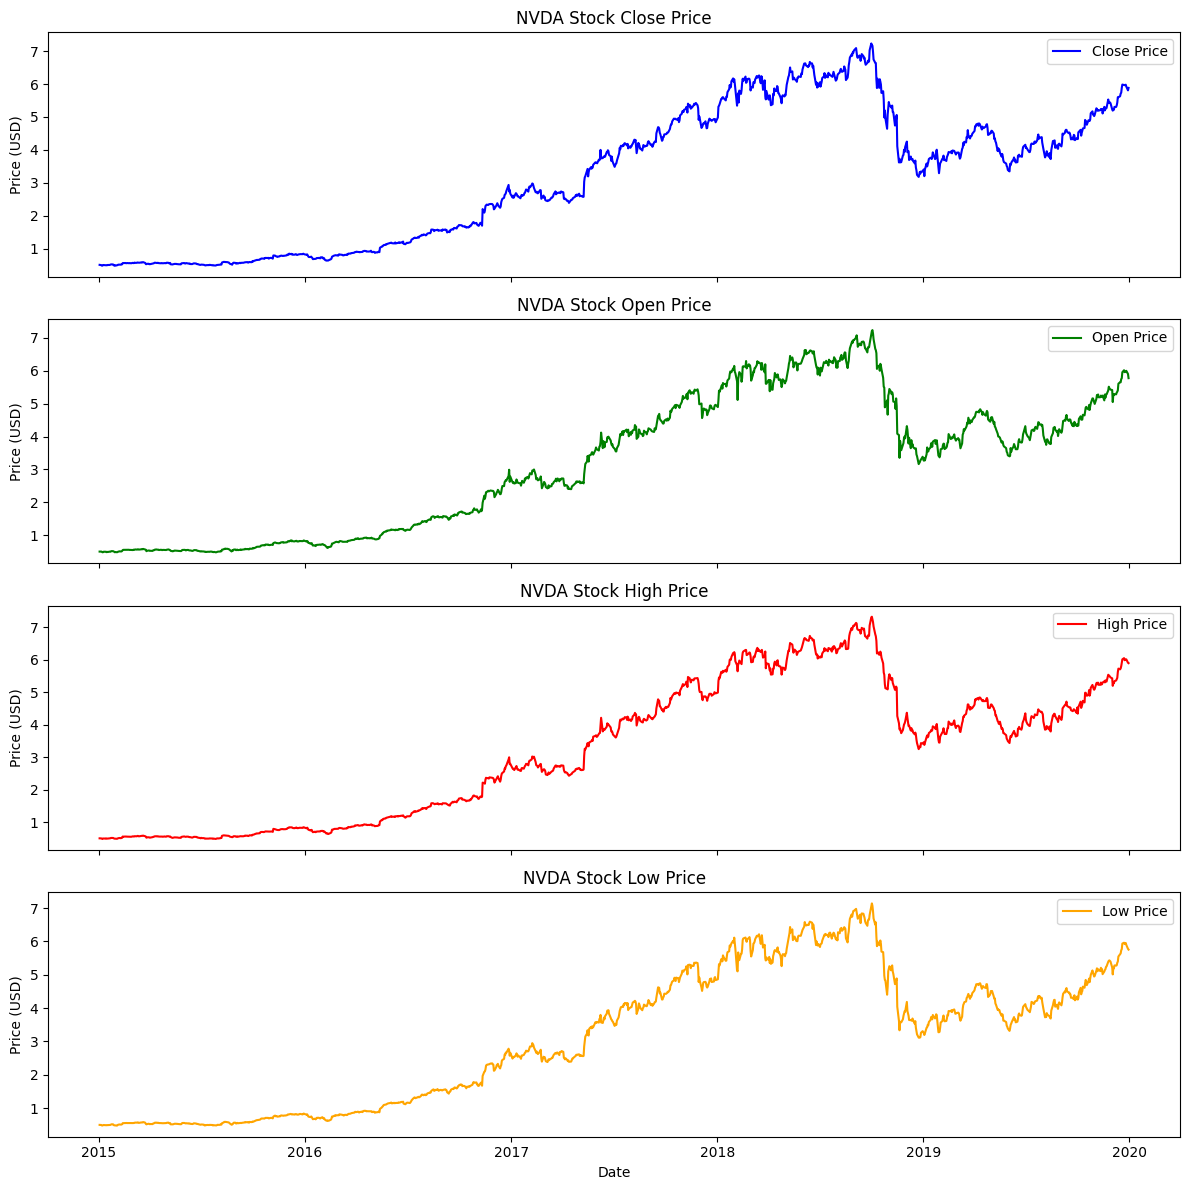

In [10]:
attributes = ['Close', 'Open', 'High', 'Low']
colors = ['blue', 'green', 'red', 'orange']  # colors for each attribute

fig, axs = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

for i, attribute in enumerate(attributes):
    axs[i].plot(data_dict['NVDA'][attribute], label=f'{attribute} Price', color=colors[i])
    axs[i].set_title(f'NVDA Stock {attribute} Price')
    axs[i].set_ylabel('Price (USD)')
    axs[i].legend()

axs[3].set_xlabel('Date')

plt.tight_layout()

plt.show()


### Moving Averages

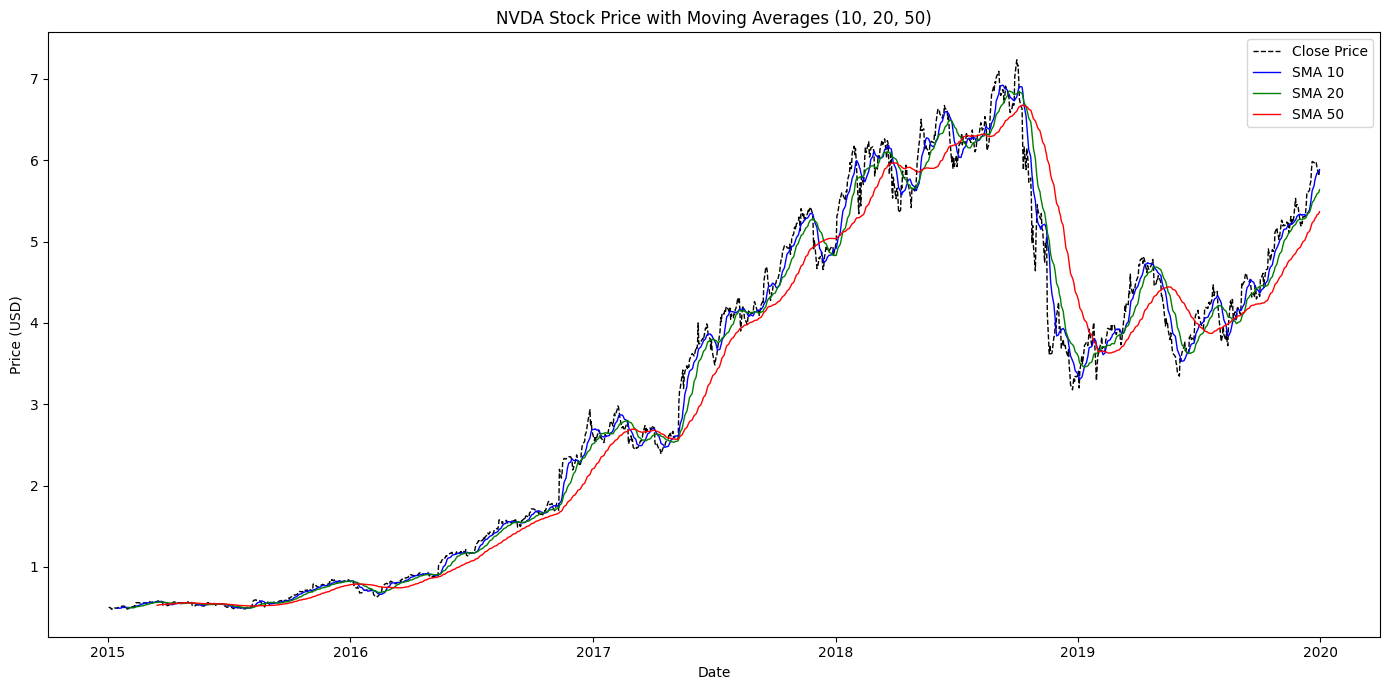

In [11]:
# calculate and plot the moving averages to check any trends

# with 10,20,50
data_dict['NVDA']['SMA10'] = data_dict['NVDA']['Close'].rolling(window=10).mean()
data_dict['NVDA']['SMA20'] = data_dict['NVDA']['Close'].rolling(window=20).mean()
data_dict['NVDA']['SMA50'] = data_dict['NVDA']['Close'].rolling(window=50).mean()

plt.figure(figsize=(14, 7))
plt.plot(data_dict['NVDA']['Close'], label='Close Price', color='black', linestyle='--', linewidth=1)
plt.plot(data_dict['NVDA']['SMA10'], label='SMA 10', color='blue', linewidth=1)
plt.plot(data_dict['NVDA']['SMA20'], label='SMA 20', color='green', linewidth=1)
plt.plot(data_dict['NVDA']['SMA50'], label='SMA 50', color='red', linewidth=1)

plt.title('NVDA Stock Price with Moving Averages (10, 20, 50)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

plt.tight_layout()
plt.show()

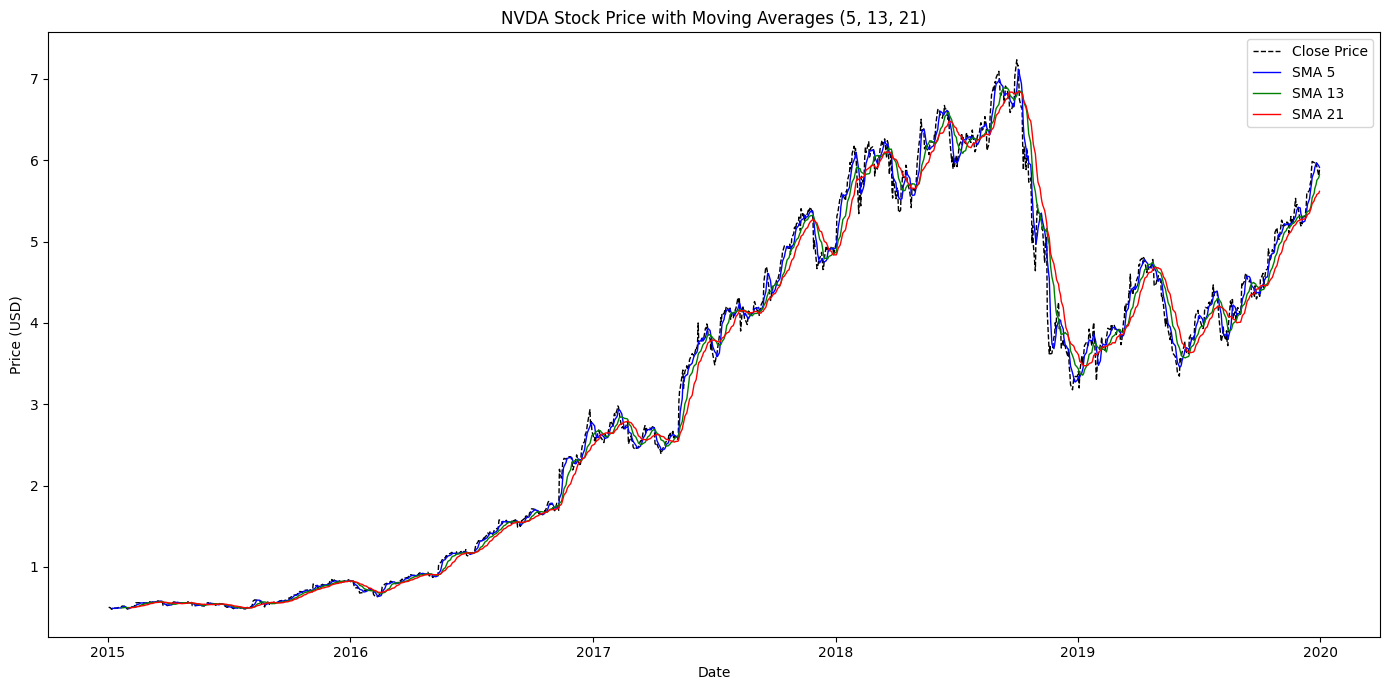

In [12]:
# calculate and plot the moving averages to check any trends

# with 5,13,21
data_dict['NVDA']['SMA5'] = data_dict['NVDA']['Close'].rolling(window=5).mean()
data_dict['NVDA']['SMA13'] = data_dict['NVDA']['Close'].rolling(window=13).mean()
data_dict['NVDA']['SMA21'] = data_dict['NVDA']['Close'].rolling(window=21).mean()

plt.figure(figsize=(14, 7))
plt.plot(data_dict['NVDA']['Close'], label='Close Price', color='black', linestyle='--', linewidth=1)
plt.plot(data_dict['NVDA']['SMA5'], label='SMA 5', color='blue', linewidth=1)
plt.plot(data_dict['NVDA']['SMA13'], label='SMA 13', color='green', linewidth=1)
plt.plot(data_dict['NVDA']['SMA21'], label='SMA 21', color='red', linewidth=1)


plt.title('NVDA Stock Price with Moving Averages (5, 13, 21)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

plt.tight_layout()
plt.show()

### Daily Return

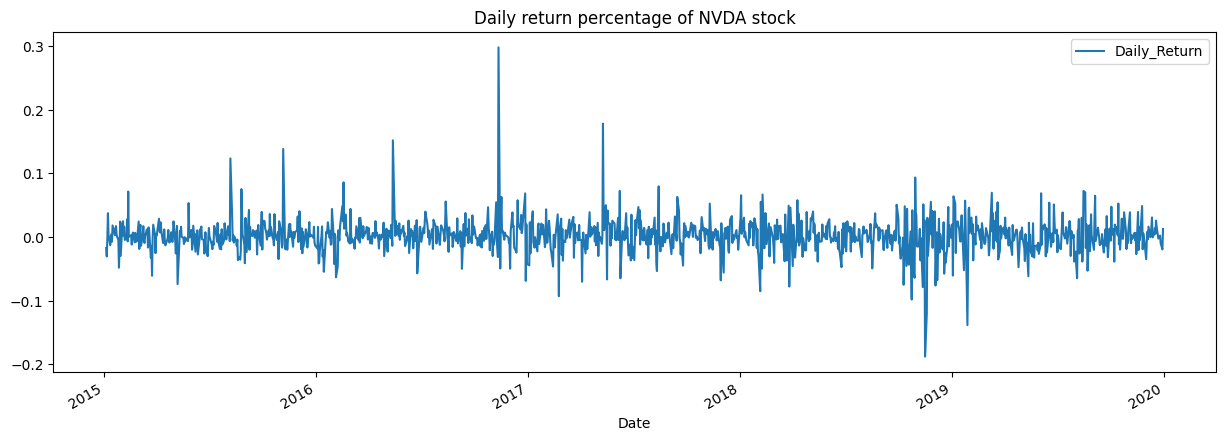

In [13]:
data_dict['NVDA']['Daily_Return'] = data_dict['NVDA']['Close'].pct_change()
# plot the daily return percentage
data_dict['NVDA']['Daily_Return'].plot(legend=True, figsize=(15,5))
plt.title('Daily return percentage of NVDA stock')
plt.show()

<Figure size 1200x800 with 0 Axes>

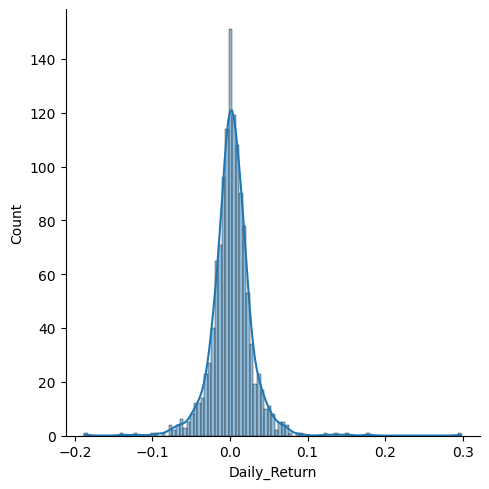

In [19]:
plt.figure(figsize=(12,8))
sns.displot(data_dict['NVDA']['Daily_Return'], kde=True)
plt.show()